In [1]:
from utils.binaries import *
from utils.plotting import *

import pickle

07:39:59 (   +5.2s) [INFO   ] -- import logging
07:39:59 (  +140ms) [INFO   ] -- import numpy as np
07:39:59 (    +6ms) [INFO   ] -- import uncertainties
07:40:00 (  +220ms) [INFO   ] -- import pandas as pd
07:40:00 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
07:40:00 (    +1ms) [INFO   ] -- import binaries.tools as tools
07:40:00 (  +272ms) [INFO   ] -- import matplotlib.pyplot as plt
07:40:00 (  +371ms) [INFO   ] -- import seaborn as so
07:40:00 (    +6ms) [DEBUG  ] -- font size set to 9.5
07:40:00 (    +1ms) [DEBUG  ] -- label size set to 13.0
07:40:00 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
07:40:00 (    +1ms) [DEBUG  ] -- markersize set to 2.0
07:40:00 (    +1ms) [DEBUG  ] -- usetex set to False
07:40:00 (    +1ms) [INFO   ] -- import plotting.tools as plot


In [2]:
def read_file(path):
    with open(path, 'rb') as f: 
        data = pickle.load(f)
    
    return data

t1_peaks, all_peaks = [], []

import os
base = '/cr/tempdata01/filip/LESimulations/processed/'
for file in tools.ProgressBar(os.listdir(base), newline=False):
    this_list = read_file(f"{base}/{file}")

    match file[-7:-4]:
        case 'all':
            all_peaks += this_list
        case '_t1':
            t1_peaks += this_list

3156/3156 [********************] || 00:00:00>00:00:00,     23361.99 it/s


In [3]:
print(len(t1_peaks))
print(len(all_peaks))

260
86795


/tmp/ipykernel_328109/1176744029.py:6: RuntimeWarning: divide by zero encountered in divide
  y_err = np.sqrt(y * (1/n_t1 + 1/n_all))
/tmp/ipykernel_328109/1176744029.py:6: RuntimeWarning: invalid value encountered in multiply
  y_err = np.sqrt(y * (1/n_t1 + 1/n_all))


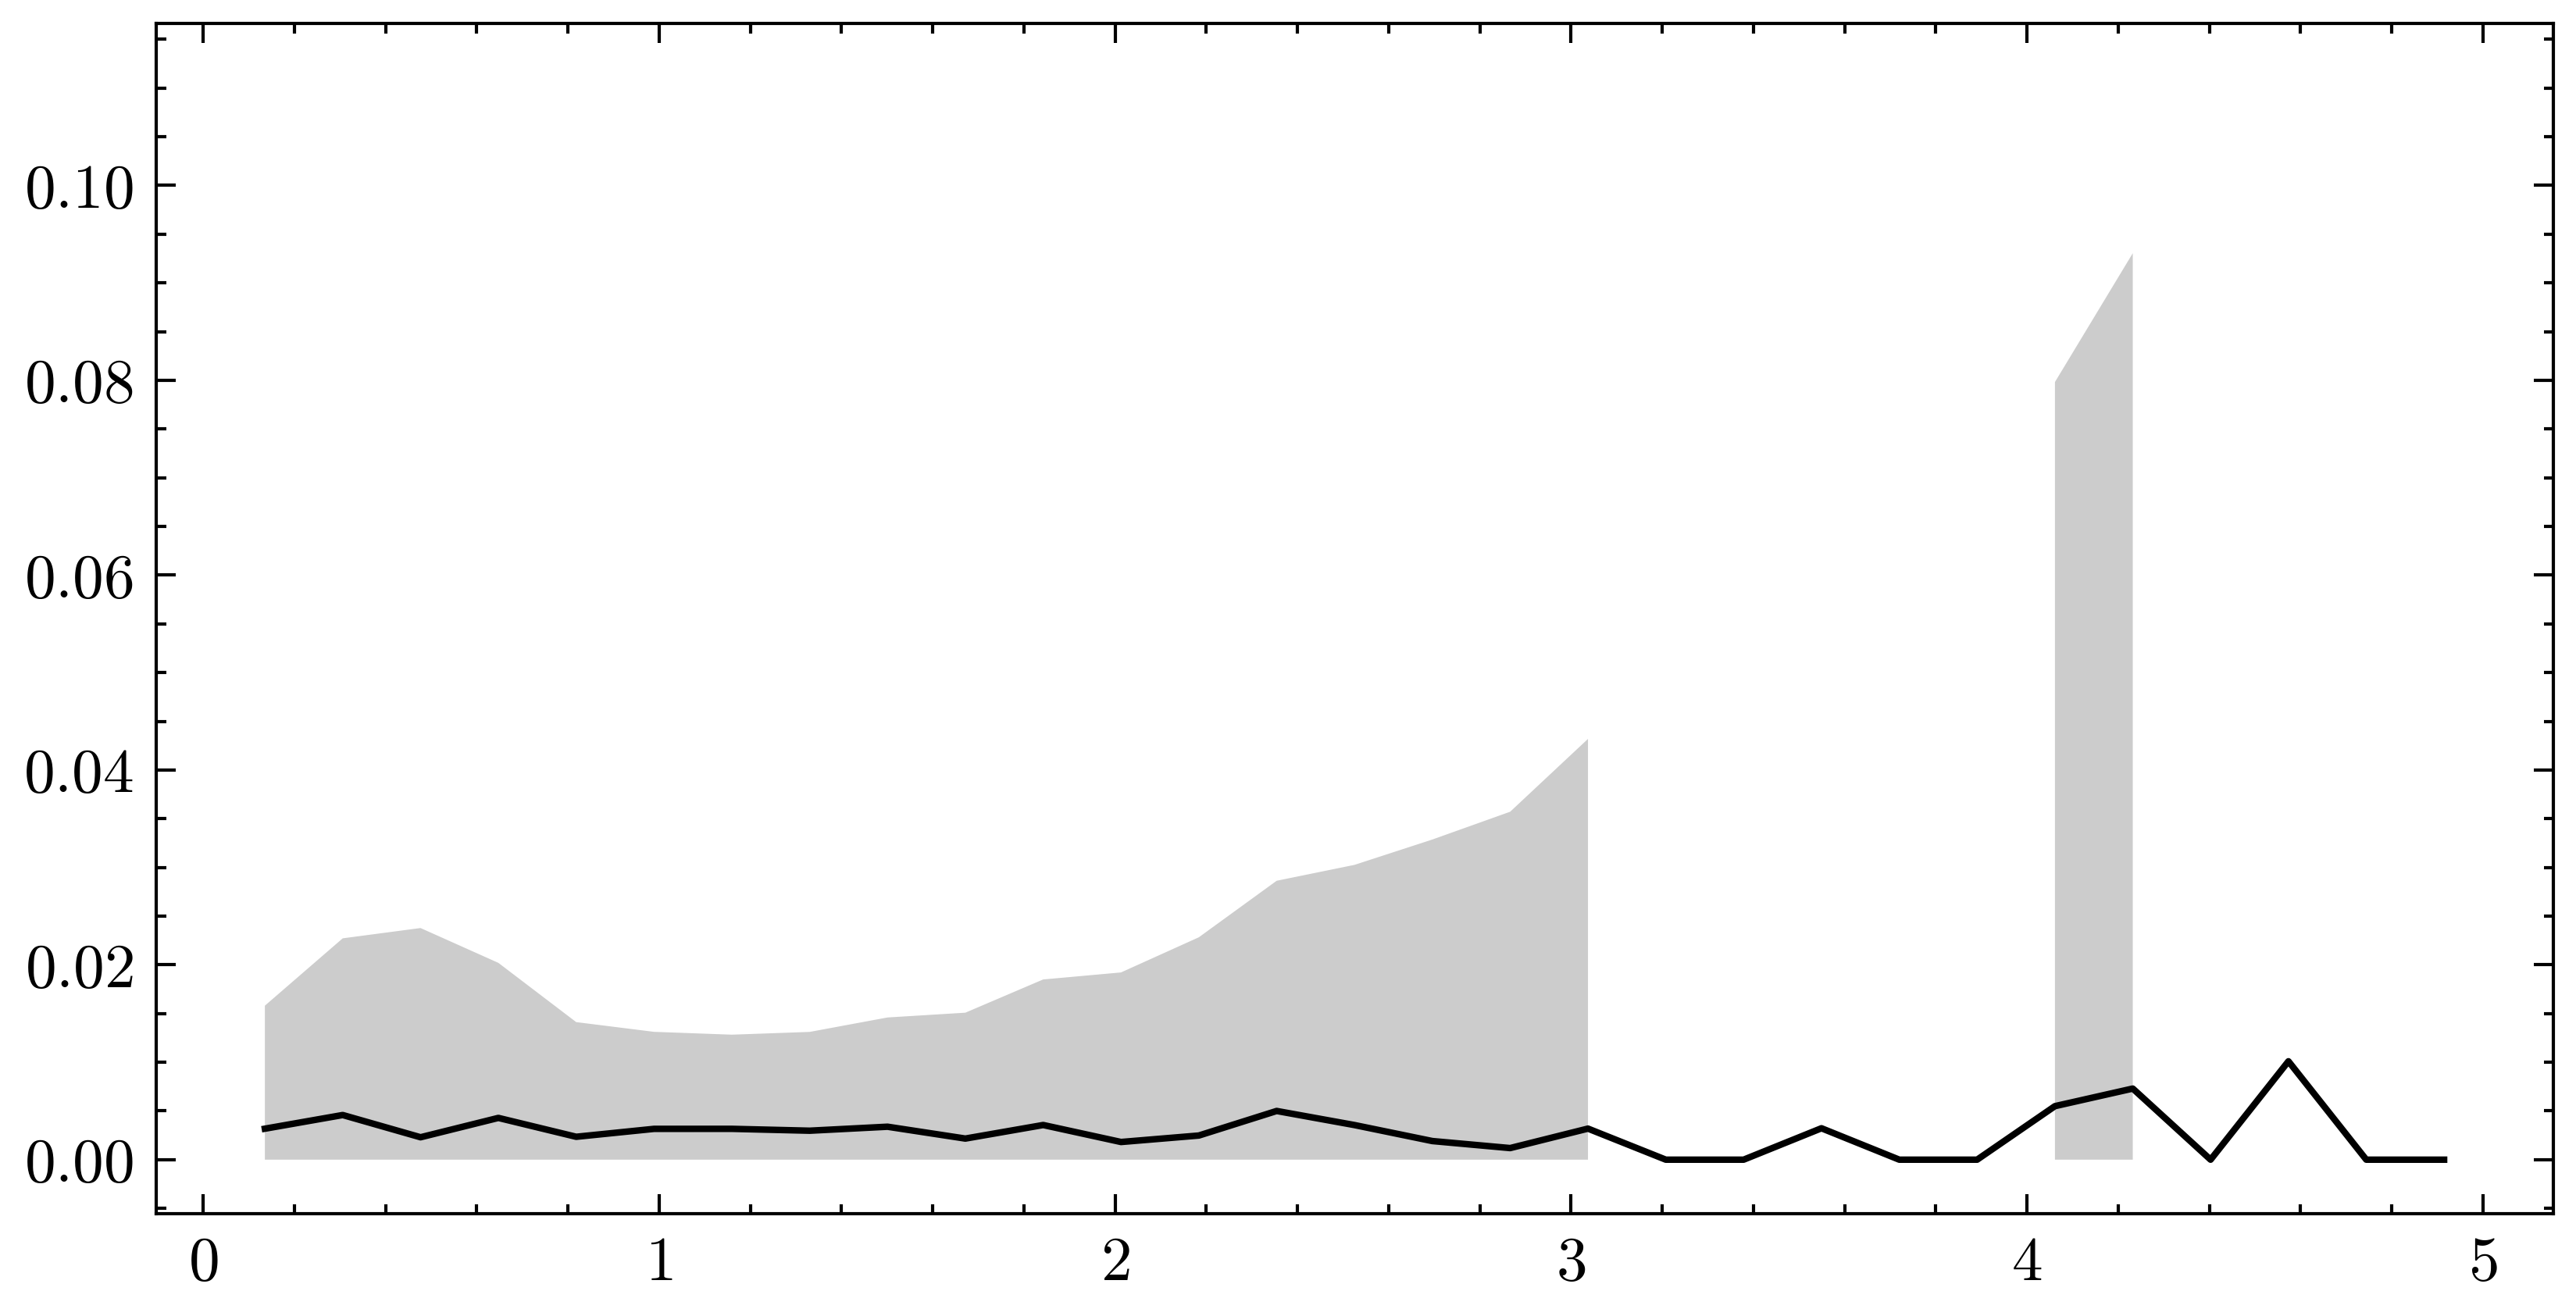

In [15]:
bins = np.linspace(5e-2, 5, 30)

n_t1, bins = np.histogram(t1_peaks, bins=bins)
n_all, bins = np.histogram(all_peaks, bins=bins)
x, y = 0.5 * (bins[1:] + bins[:-1]), n_t1 / n_all
y_err = np.sqrt(y * (1/n_t1 + 1/n_all))



plt.plot(x, y)
plt.fill_between(x, np.clip(y + y_err, 0, 1), np.clip(y - y_err, 0, 1), alpha=0.2)

# n_t1, bins

In [17]:
print(','.join([f"{a:.3f}" for a in x]))
print(','.join([f"{a:.3f}" for a in y]))
print(','.join([f"{a:.3f}" for a in y_err]))

0.135,0.306,0.477,0.647,0.818,0.989,1.159,1.330,1.501,1.672,1.842,2.013,2.184,2.354,2.525,2.696,2.866,3.037,3.208,3.378,3.549,3.720,3.891,4.061,4.232,4.403,4.573,4.744,4.915
0.003,0.005,0.002,0.004,0.002,0.003,0.003,0.003,0.003,0.002,0.004,0.002,0.002,0.005,0.004,0.002,0.001,0.003,0.000,0.000,0.003,0.000,0.000,0.005,0.007,0.000,0.010,0.000,0.000
0.013,0.018,0.021,0.016,0.012,0.010,0.010,0.010,0.011,0.013,0.015,0.017,0.020,0.024,0.027,0.031,0.035,0.040,nan,nan,0.057,nan,nan,0.074,0.086,nan,0.101,nan,nan
